In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
tf.keras.applications.resnet.preprocess_input


<function keras.src.applications.resnet.preprocess_input(x, data_format=None)>

In [2]:
# Path to your dataset
DATA_DIR = "./dataset/"  
TRAIN_DIR = "./dataset/train/"
VALID_DIR = "./dataset/valid/"
TEST_DIR = "./test1/"

# Image dimensions for pretrained models
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32


In [ ]:
# Data generators with augmentation for training
Train_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

Val_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

Test_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# Training data generator
train_generator = Train_Datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Validation data generator
validation_generator = Val_Datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Test data generator
test_generator = Test_Datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 17372 images belonging to 9 classes.
Found 3044 images belonging to 9 classes.
Found 1299 images belonging to 9 classes.


In [ ]:
# Define the ResNet50 model
# Load ResNet50 with pretrained ImageNet weights
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers to retain pretrained features
for layer in base_resnet.layers:
    layer.trainable = False

# Custom top layers for plant disease classification
x = base_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

resnet_model = Model(inputs=base_resnet.input, outputs=predictions)

# Compile
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [ ]:
# Trainin model and save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    filepath='resnet_best_model.h5',  
    monitor='val_accuracy',     
    save_best_only=True,        
    save_weights_only=False,    
    mode='max',                 
    verbose=1
)

# Training ResNet50
resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[checkpoint]
)


d:\Coding\Python\NEW\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7298 - loss: 0.8475
Epoch 1: val_accuracy improved from -inf to 0.97569, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 922s 2s/step - accuracy: 0.7301 - loss: 0.8467 - val_accuracy: 0.9757 - val_loss: 0.0861
Epoch 2/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9670 - loss: 0.1105
Epoch 2: val_accuracy improved from 0.97569 to 0.98817, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 873s 2s/step - accuracy: 0.9670 - loss: 0.1105 - val_accuracy: 0.9882 - val_loss: 0.0494
Epoch 3/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9811 - loss: 0.0663
Epoch 3: val_accuracy improved from 0.98817 to 0.99047, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 853s 2s/step - accuracy: 0.9812 - loss: 0.0663 - val_accuracy: 0.9905 - val_loss: 0.0355
Epoch 4/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9861 - loss: 0.0470
Epoch 4: val_accuracy improved from 0.99047 to 0.99146, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.9861 - loss: 0.0470 - val_accuracy: 0.9915 - val_loss: 0.0285
Epoch 5/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9919 - loss: 0.0306
Epoch 5: val_accuracy did not improve from 0.99146
543/543 ━━━━━━━━━━━━━━━━━━━━ 847s 2s/step - accuracy: 0.9919 - loss: 0.0306 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 6/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9934 - loss: 0.0243
Epoch 6: val_accuracy improved from 0.99146 to 0.99409, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 843s 2s/step - accuracy: 0.9934 - loss: 0.0243 - val_accuracy: 0.9941 - val_loss: 0.0230
Epoch 7/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9952 - loss: 0.0192
Epoch 7: val_accuracy improved from 0.99409 to 0.99474, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.9952 - loss: 0.0192 - val_accuracy: 0.9947 - val_loss: 0.0199
Epoch 8/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9957 - loss: 0.0167
Epoch 8: val_accuracy improved from 0.99474 to 0.99507, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 841s 2s/step - accuracy: 0.9957 - loss: 0.0167 - val_accuracy: 0.9951 - val_loss: 0.0202
Epoch 9/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9967 - loss: 0.0133
Epoch 9: val_accuracy did not improve from 0.99507
543/543 ━━━━━━━━━━━━━━━━━━━━ 848s 2s/step - accuracy: 0.9967 - loss: 0.0133 - val_accuracy: 0.9924 - val_loss: 0.0214
Epoch 10/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9977 - loss: 0.0101
Epoch 10: val_accuracy improved from 0.99507 to 0.99573, saving model to resnet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 846s 2s/step - accuracy: 0.9977 - loss: 0.0101 - val_accuracy: 0.9957 - val_loss: 0.0167
Epoch 11/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9976 - loss: 0.0096
Epoch 11: val_accuracy did not improve from 0.99573
543/543 ━━━━━━━━━━━━━━━━━━━━ 843s 2s/step - accuracy: 0.9976 - loss: 0.0096 - val_accuracy: 0.9947 - val_loss: 0.0181
Epoch 12/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9990 - loss: 0.0076
Epoch 12: val_accuracy did not improve from 0.99573
543/543 ━━━━━━━━━━━━━━━━━━━━ 842s 2s/step - accuracy: 0.9990 - loss: 0.0076 - val_accuracy: 0.9957 - val_loss: 0.0161
Epoch 13/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9979 - loss: 0.0076
Epoch 13: val_accuracy did not improve from 0.99573
543/543 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9944 - val_loss: 0.0173
Epoch 14/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9986 - loss: 0.0067
Epoch 14: val_accuracy impro

543/543 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.9967 - val_loss: 0.0132
Epoch 15/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9994 - loss: 0.0054
Epoch 15: val_accuracy did not improve from 0.99671
543/543 ━━━━━━━━━━━━━━━━━━━━ 841s 2s/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.9957 - val_loss: 0.0151


In [ ]:
# Function to plot confusion matrix from testing data
resnet_model = load_model('resnet_best_model.h5')

test_steps = test_generator.samples // BATCH_SIZE + 1

resnet_preds = resnet_model.predict(test_generator, steps=test_steps)

resnet_pred_labels = np.argmax(resnet_preds, axis=1)

true_labels = test_generator.classes

print("ResNet50 Report (Test Set):\n",
      classification_report(true_labels, resnet_pred_labels,
                            target_names=list(test_generator.class_indices.keys())))


d:\Coding\Python\NEW\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step
ResNet50 Report (Test Set):
                        precision    recall  f1-score   support

   Apple___Apple_scab       1.00      0.99      0.99       151
    Apple___Black_rot       0.99      1.00      0.99       149
      Apple___healthy       1.00      1.00      1.00       150
Potato___Early_blight       1.00      1.00      1.00       145
 Potato___Late_blight       0.98      0.99      0.99       145
     Potato___healthy       1.00      1.00      1.00       136
 Tomato___Late_blight       0.99      0.97      0.98       138
   Tomato___Leaf_Mold       0.99      1.00      0.99       141
     Tomato___healthy       1.00      0.99      1.00       144

             accuracy                           0.99      1299
            macro avg       0.99      0.99      0.99      1299
         weighted avg       0.99      0.99      0.99      1299



41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step


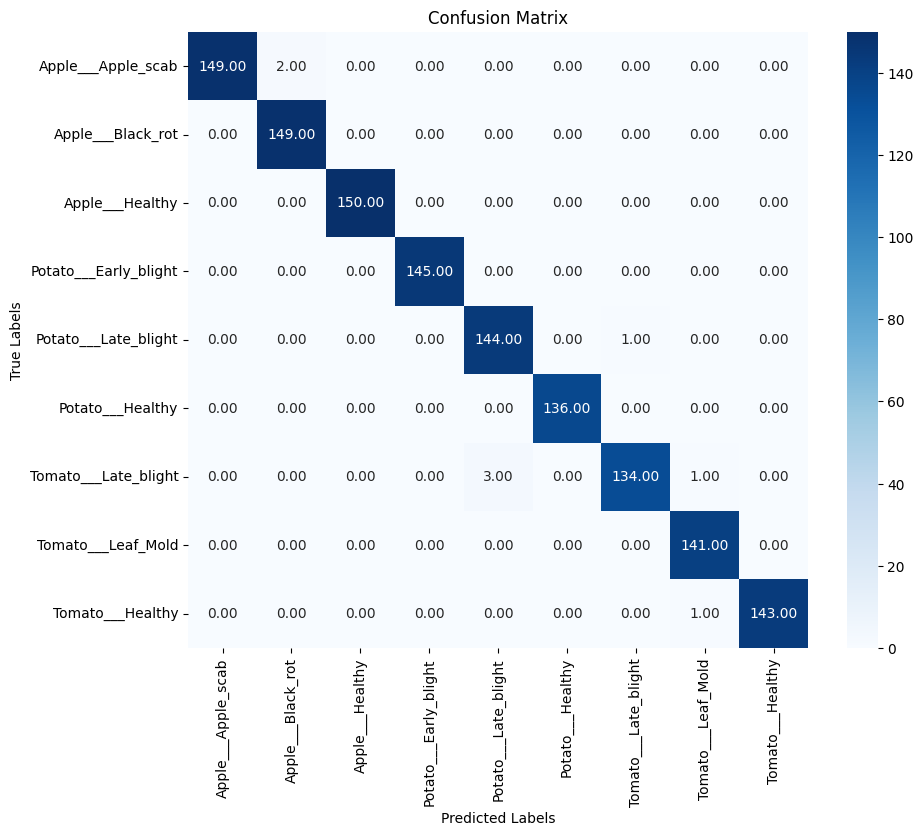

In [ ]:
# Plotting confusion matrix from testing data
def plot_confusion_matrix(model, test_generator, class_names):

    true_labels = test_generator.classes
    pred_probs = model.predict(test_generator)
    pred_labels = np.argmax(pred_probs, axis=1)
    cm = confusion_matrix(true_labels, pred_labels)

    # Plot
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='.2f',
                xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Confusion Matrix')
    plt.show()


class_names = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___Healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Healthy'
]
# Call the function to plot confusion matrix
plot_confusion_matrix(resnet_model, test_generator, class_names)


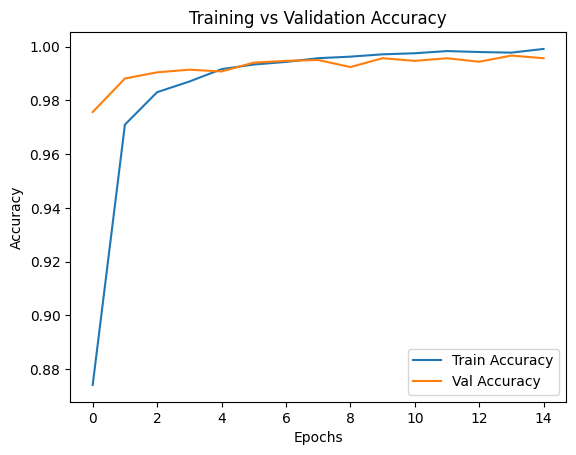

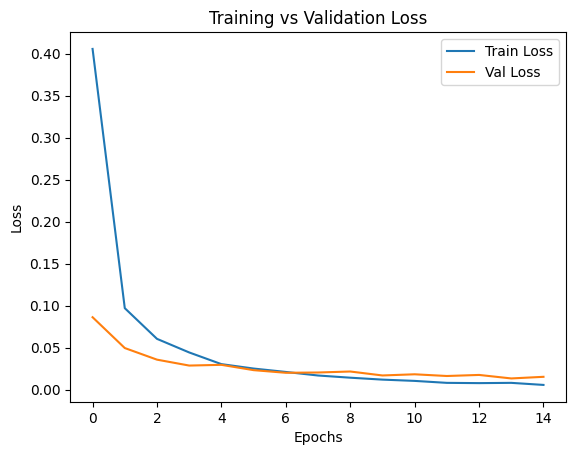

In [ ]:

# Accuracy curves for ResNet50
plt.plot(resnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss curves for ResNet50
plt.plot(resnet_history.history['loss'], label='Train Loss')
plt.plot(resnet_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
